## Predictive Analytics Final
## Bellevue University 

**Purpose:** 

The purpose of this document is to examine the impact of Churn as it relates to the Telecom industry. This analysis examines code that has be untilized, while explore alternatives such as grouping features that are otherwise seperated (e.g., Streaming Services vs Tv Stream/Movie Stream and Security vs different types). Moreover, this analysis adds 10 Machine Learning algorithms to examine the ROC and AUC differences. The hyperparameter of L2 Ridge was used in this analysis and the most important features printed. This analysis opted to print the Logistic regression summary without changing the data frame as is knowing the inputs remain constant the oods of success are based off each features coeffienct value. Lastly, the model accuracy is 85% for the logistic classifier. 


In [1]:
## Importing the libraries
## Importing the data frame 

import numpy as np
import seaborn as sns
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings;warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

df = pd.read_csv('Telco_Cust_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.shape

(7043, 21)

In [3]:
df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
for col in df.columns.to_list():
    print(df[col].value_counts())
    print()

9033-EOXWV    1
0733-VUNUW    1
0231-LXVAP    1
9975-GPKZU    1
4835-YSJMR    1
             ..
1685-VAYJF    1
9933-QRGTX    1
9680-NIAUV    1
0104-PPXDV    1
0495-RVCBF    1
Name: customerID, Length: 7043, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64

No     4933
Yes    2110
Name: Dependents, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Yes    6361
No      682
Name: PhoneService, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

No                   

In [6]:
# No phone service
df[df.PhoneService=='No'].MultipleLines.value_counts()

No phone service    682
Name: MultipleLines, dtype: int64

In [7]:
# No internet service
for col in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
    print(df[df.InternetService=='No'][col].value_counts())
    print

No internet service    1526
Name: OnlineSecurity, dtype: int64
No internet service    1526
Name: OnlineBackup, dtype: int64
No internet service    1526
Name: DeviceProtection, dtype: int64
No internet service    1526
Name: TechSupport, dtype: int64
No internet service    1526
Name: StreamingTV, dtype: int64
No internet service    1526
Name: StreamingMovies, dtype: int64


**EDA**

In [8]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
df.columns.to_list()

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [10]:
num_feature = ['tenure','MonthlyCharges'] #TotalCharges is processed separately since the data is not stored in float type
cat_feature = ['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
    'tenure_bin']

In [11]:
df[num_feature].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [12]:
df['tenure_bin'] = pd.cut(df.tenure,pd.IntervalIndex.from_tuples([(-1,6),(6,12),(12,18),(18,24),(24,30),(30,36),
                                                                 (36,42),(42,48),(48,54),(54,60),(60,66),(66,72)]))

<AxesSubplot:xlabel='InternetService', ylabel='MonthlyCharges'>

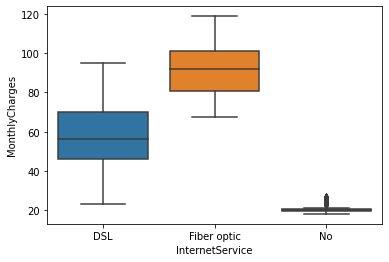

In [13]:
# Compare the MonthlyCharges between InternetService
sns.boxplot(x='InternetService',y='MonthlyCharges',data=df)

**Data cleaning**

In [14]:
df[pd.to_numeric(df['TotalCharges'], errors='coerce').isna()][['TotalCharges','Churn']]

,TotalCharges,Churn
488,,No
753,,No
936,,No
1082,,No
1340,,No
3331,,No
3826,,No
4380,,No
5218,,No
6670,,No


In [15]:
# Cast TotalCharges as float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [16]:
# Remove rows with missing TotalCharges and reset index
df = df[df.TotalCharges.notna()]
df.reset_index(inplace=True, drop=True)

In [17]:
df.count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
tenure_bin          7032
dtype: int64

In [18]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

**Feature Engineering**

In [19]:
df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin
7022,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,"(36, 42]"
7023,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,"(66, 72]"
7024,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No,"(18, 24]"
7025,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No,"(6, 12]"
7026,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,"(66, 72]"
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,"(18, 24]"
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,"(66, 72]"
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,"(6, 12]"
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,"(-1, 6]"
7031,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No,"(60, 66]"


In [20]:
# Convert needed reference columns to numerical

# Separate columns into type of scaling needed
no_col = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
          'StreamingTV','StreamingMovies']
t_f = ['Partner','Dependents']

for col in no_col:
    df[col] = df[col].replace('No internet service',0)
    df[col] = df[col].replace('No',0)
    df[col] = df[col].replace('Yes',1)
    df[col] = df[col].astype(int)

for col in t_f:
    df[col] = df[col].replace('No',0)
    df[col] = df[col].replace('Yes',1)
    df[col] = df[col].astype(int)

df.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bin
7022,9767-FFLEM,Male,0,0,0,38,Yes,No,Fiber optic,0,...,0,0,0,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,"(36, 42]"
7023,0639-TSIQW,Female,0,0,0,67,Yes,Yes,Fiber optic,1,...,0,1,0,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,"(66, 72]"
7024,8456-QDAVC,Male,0,0,0,19,Yes,No,Fiber optic,0,...,0,1,0,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.10,No,"(18, 24]"
7025,7750-EYXWZ,Female,0,0,0,12,No,No phone service,DSL,0,...,1,1,1,One year,No,Electronic check,60.65,743.30,No,"(6, 12]"
7026,2569-WGERO,Female,0,0,0,72,Yes,No,No,0,...,0,0,0,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,"(66, 72]"
7027,6840-RESVB,Male,0,1,1,24,Yes,Yes,DSL,1,...,1,1,1,One year,Yes,Mailed check,84.80,1990.50,No,"(18, 24]"
7028,2234-XADUH,Female,0,1,1,72,Yes,Yes,Fiber optic,0,...,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.90,No,"(66, 72]"
7029,4801-JZAZL,Female,0,1,1,11,No,No phone service,DSL,1,...,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No,"(6, 12]"
7030,8361-LTMKD,Male,1,1,0,4,Yes,Yes,Fiber optic,0,...,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,"(-1, 6]"
7031,3186-AJIEK,Male,0,0,0,66,Yes,No,Fiber optic,1,...,1,1,1,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No,"(60, 66]"


In [21]:
# Create a few new calculated columns

# Make new column for online support tools
df['OnlineTools'] = df[['OnlineSecurity','OnlineBackup','DeviceProtection',
                        'TechSupport']].values.max(1)

# Make new column for streaming services
df['Streaming'] = df[['StreamingTV','StreamingMovies']].values.max(1)

# Make new column for family vs single
df['Family'] = df[['Dependents','Partner']].values.max(1)

# Make new column for additional charges
df['AdditionalCharges'] = df['TotalCharges'] - df['MonthlyCharges']

# Is the contract near an end point?
df['tenure'].astype(int)
df['ContractEnding'] = 0
for idx,val in enumerate(df['Contract']):
    if val == 'Two year' and df['tenure'][idx]%24 in [23,0,1]:
        df['ContractEnding'][idx] = 1
    elif val == 'One year' and df['tenure'][idx]%12 in [11,0,1]:
        df['ContractEnding'][idx] = 1
    else:
        df['ContractEnding'][idx] = 0

# Drop newly unecessary columns
df.drop(columns=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                'StreamingTV','StreamingMovies','Dependents','Partner','TotalCharges'],
        inplace=True)

df.tail(10)

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,tenure_bin,OnlineTools,Streaming,Family,AdditionalCharges,ContractEnding
7022,9767-FFLEM,Male,0,38,Yes,No,Fiber optic,Month-to-month,Yes,Credit card (automatic),69.50,No,"(36, 42]",0,0,0,2555.75,0
7023,0639-TSIQW,Female,0,67,Yes,Yes,Fiber optic,Month-to-month,Yes,Credit card (automatic),102.95,Yes,"(66, 72]",1,1,0,6783.30,0
7024,8456-QDAVC,Male,0,19,Yes,No,Fiber optic,Month-to-month,Yes,Bank transfer (automatic),78.70,No,"(18, 24]",0,1,0,1416.40,0
7025,7750-EYXWZ,Female,0,12,No,No phone service,DSL,One year,No,Electronic check,60.65,No,"(6, 12]",1,1,0,682.65,1
7026,2569-WGERO,Female,0,72,Yes,No,No,Two year,Yes,Bank transfer (automatic),21.15,No,"(66, 72]",0,0,0,1398.25,1
7027,6840-RESVB,Male,0,24,Yes,Yes,DSL,One year,Yes,Mailed check,84.80,No,"(18, 24]",1,1,1,1905.70,1
7028,2234-XADUH,Female,0,72,Yes,Yes,Fiber optic,One year,Yes,Credit card (automatic),103.20,No,"(66, 72]",1,1,1,7259.70,1
7029,4801-JZAZL,Female,0,11,No,No phone service,DSL,Month-to-month,Yes,Electronic check,29.60,No,"(6, 12]",1,0,1,316.85,0
7030,8361-LTMKD,Male,1,4,Yes,Yes,Fiber optic,Month-to-month,Yes,Mailed check,74.40,Yes,"(-1, 6]",0,0,1,232.20,0
7031,3186-AJIEK,Male,0,66,Yes,No,Fiber optic,Two year,Yes,Bank transfer (automatic),105.65,No,"(60, 66]",1,1,0,6738.85,0


In [22]:
def feat_engg(df):
    df['Churn'] = (df.Churn=='Yes')*1
    df['Female'] = (df.gender == 'Female')*1
    df['PhoneService'] = (df.PhoneService=='Yes')*1
    df['MultipleLines'] = (df.MultipleLines=='Yes')*1
    df = pd.concat([df, pd.get_dummies(df.InternetService, prefix='InternetService').drop('InternetService_No',axis=1)], axis=1)
    df = pd.concat([df, pd.get_dummies(df.Contract, prefix='Contract', drop_first=True)], axis=1)
    df['PaperlessBilling'] = (df.PaperlessBilling=='Yes')*1
    df = pd.concat([df, pd.get_dummies(df.PaymentMethod, prefix='PaymentMethod', drop_first=True)], axis=1)
    df = pd.concat([df, pd.get_dummies(df.tenure_bin, prefix='tenure_bin')], axis=1)
    # Drop unnecessary columns
    df = df.drop(['customerID','gender','InternetService','Contract','PaymentMethod','tenure_bin','tenure'],axis=1)
    return df

In [23]:
engg_df = feat_engg(df)
engg_df.tail(10)

,SeniorCitizen,PhoneService,MultipleLines,PaperlessBilling,MonthlyCharges,Churn,OnlineTools,Streaming,Family,AdditionalCharges,...,"tenure_bin_(12, 18]","tenure_bin_(18, 24]","tenure_bin_(24, 30]","tenure_bin_(30, 36]","tenure_bin_(36, 42]","tenure_bin_(42, 48]","tenure_bin_(48, 54]","tenure_bin_(54, 60]","tenure_bin_(60, 66]","tenure_bin_(66, 72]"
7022,0,1,0,1,69.50,0,0,0,0,2555.75,...,0,0,0,0,1,0,0,0,0,0
7023,0,1,1,1,102.95,1,1,1,0,6783.30,...,0,0,0,0,0,0,0,0,0,1
7024,0,1,0,1,78.70,0,0,1,0,1416.40,...,0,1,0,0,0,0,0,0,0,0
7025,0,0,0,0,60.65,0,1,1,0,682.65,...,0,0,0,0,0,0,0,0,0,0
7026,0,1,0,1,21.15,0,0,0,0,1398.25,...,0,0,0,0,0,0,0,0,0,1
7027,0,1,1,1,84.80,0,1,1,1,1905.70,...,0,1,0,0,0,0,0,0,0,0
7028,0,1,1,1,103.20,0,1,1,1,7259.70,...,0,0,0,0,0,0,0,0,0,1
7029,0,0,0,1,29.60,0,1,0,1,316.85,...,0,0,0,0,0,0,0,0,0,0
7030,1,1,1,1,74.40,1,0,0,1,232.20,...,0,0,0,0,0,0,0,0,0,0
7031,0,1,0,1,105.65,0,1,1,0,6738.85,...,0,0,0,0,0,0,0,0,1,0


In [24]:
engg_df.shape

(7032, 31)

**Pandas Profilling Report**

In [25]:
engg_df.profile_report()

**Training and Test Split**

In [26]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(engg_df, test_size=0.30, random_state=42)

In [27]:
train.Churn.value_counts()

0    3614
1    1308
Name: Churn, dtype: int64

In [28]:
test.Churn.value_counts()

0    1549
1     561
Name: Churn, dtype: int64

In [29]:
# Checking Test and Train to see if similiar
print(len(train[train.Churn==1])/len(train))
print(len(test[test.Churn==1])/len(test))

0.2657456318569687
0.26587677725118486


**Correlations**

In [30]:
# Feature correlation with target
train.corr()['Churn'].sort_values(ascending=False)

Churn                                    1.000000
InternetService_Fiber optic              0.319334
tenure_bin_(-1, 6]                       0.314846
PaymentMethod_Electronic check           0.291697
MonthlyCharges                           0.201495
PaperlessBilling                         0.178155
SeniorCitizen                            0.155861
Streaming                                0.086785
tenure_bin_(6, 12]                       0.072685
MultipleLines                            0.041077
tenure_bin_(12, 18]                      0.035695
PhoneService                             0.018344
Female                                   0.013879
tenure_bin_(24, 30]                     -0.016771
tenure_bin_(18, 24]                     -0.018756
tenure_bin_(30, 36]                     -0.030368
tenure_bin_(36, 42]                     -0.032117
OnlineTools                             -0.045427
tenure_bin_(48, 54]                     -0.045944
tenure_bin_(42, 48]                     -0.063505


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

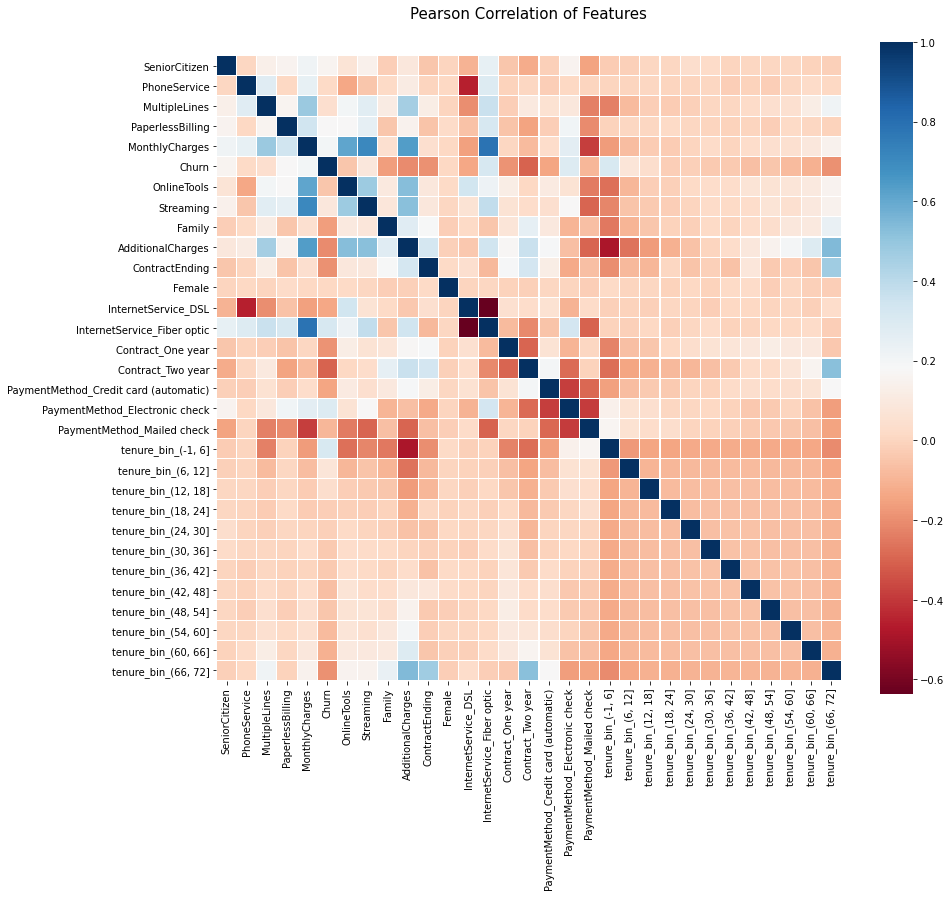

In [31]:
# Draw correlation heatmap
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=False)

**Model Selection**

In [32]:
X = train.drop('Churn',axis=1)
y = train.Churn

In [33]:
roc_auc={}
pr_auc={}

In [34]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
scores = cross_validate(rfc,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['RandomForest'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['RandomForest'] = np.mean(np.array(scores['test_average_precision']))

In [35]:
# SVC
from sklearn.svm import SVC

svc = SVC(random_state=42)
scores = cross_validate(svc,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['SVC'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['SVC'] = np.mean(np.array(scores['test_average_precision']))

In [36]:
# Xgbclassifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
scores = cross_validate(xgb,X.values,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision')) #somehow model will turn Nan score due to naming convention in tenure_bin. hence, remove the column names
roc_auc['XGBClassifier'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['XGBClassifier'] = np.mean(np.array(scores['test_average_precision']))

In [37]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
scores = cross_validate(lr,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['LogisticRegression'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['LogisticRegression'] = np.mean(np.array(scores['test_average_precision']))

In [38]:
#lgbm 
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
scores = cross_validate(lgbm,X.values,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['LGBMClassifier'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['LGBMClassifier'] = np.mean(np.array(scores['test_average_precision']))

In [39]:
# KNeighborClassifier

from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
scores = cross_validate(knc,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['KNeighborsClassifier'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['KNeighborsClassifier'] = np.mean(np.array(scores['test_average_precision']))

In [40]:
# Stochastic Gradient Decent (SGD)
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
scores = cross_validate(clf,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['StochasticGradientDecent'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['StochasticGradientDecent'] = np.mean(np.array(scores['test_average_precision']))

In [41]:
# Neural Network

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
scores = cross_validate(clf,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['NeuralNetworks'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['NeuralNetworks'] = np.mean(np.array(scores['test_average_precision']))

In [42]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
scores = cross_validate(gnb,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['NavieBayes'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['NaiveBayes'] = np.mean(np.array(scores['test_average_precision']))

In [43]:
#Decision Tree

from sklearn import tree

dt = tree.DecisionTreeClassifier()
scores = cross_validate(dt,X,y,cv=5, n_jobs=-1, scoring=('roc_auc', 'average_precision'))
roc_auc['DecisionTree'] = np.mean(np.array(scores['test_roc_auc']))
pr_auc['DecisionTree'] = np.mean(np.array(scores['test_average_precision']))

In [44]:
pd.DataFrame.from_dict(roc_auc,orient='index', columns=['ROC-AUC']).sort_values(by='ROC-AUC', ascending=False)

,ROC-AUC
LogisticRegression,0.845861
LGBMClassifier,0.837963
XGBClassifier,0.827052
NavieBayes,0.821710
RandomForest,0.804059
KNeighborsClassifier,0.750649
SVC,0.710297
NeuralNetworks,0.686678
DecisionTree,0.668590
StochasticGradientDecent,0.634211


In [45]:
pd.DataFrame.from_dict(pr_auc,orient='index', columns=['PR-AUC']).sort_values(by='PR-AUC', ascending=False)

,PR-AUC
LogisticRegression,0.651475
LGBMClassifier,0.647970
XGBClassifier,0.622803
NaiveBayes,0.616863
RandomForest,0.575666
SVC,0.517083
KNeighborsClassifier,0.498981
NeuralNetworks,0.469807
StochasticGradientDecent,0.466449
DecisionTree,0.389152


**Discussion:** Hyperparameters

Using the hyperparamter funciton, the penalty allowed with the solvers of `liblinear`, `newton-cg`,`lbfgs`,`sag`, and `saga` only would allow the L2 Ridge penalty. With this penalty, the coefficients are all shurnk to the same factor without eliminating features. 

Therefore, we will look at the importance of features before the final output summary of logistic regression. 

In [46]:
from scipy.stats import loguniform

params = {
    'penalty':['l2'],
    'C': loguniform(1e-3, 1000),
    'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}

In [47]:
model = RandomizedSearchCV(lr, params, random_state=42, n_iter=300, scoring='roc_auc', n_jobs=-1, cv=5, refit=True)

In [48]:
# This process might take some time due to large number of iterations
search = model.fit(X, y)

In [49]:
print(search.best_params_)
print("\n")
print ("Model accuracy:")
print(search.best_score_)

{'C': 0.6485804474038589, 'penalty': 'l2', 'solver': 'newton-cg'}


Model accuracy:
0.8480396687627213


In [50]:
best_model = search.best_estimator_

In [51]:
# Feature importance
lr_coef = pd.DataFrame(best_model.coef_[0], index=X.columns.to_list(), columns=['coef'])
lr_coef.sort_values('coef', ascending=False)

,coef
"tenure_bin_(-1, 6]",1.290364
InternetService_Fiber optic,0.748451
"tenure_bin_(6, 12]",0.472417
SeniorCitizen,0.324490
PaperlessBilling,0.254902
PaymentMethod_Electronic check,0.248219
"tenure_bin_(12, 18]",0.211516
MultipleLines,0.201016
InternetService_DSL,0.167198
Streaming,0.068952


In [53]:
#logistic summary output 

import statsmodels.api as sm  
x_train1 = sm.add_constant(X)
lm_1 = sm.OLS(y, x_train1).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Churn   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     74.90
Date:                Sat, 20 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:52:13   Log-Likelihood:                -2058.3
No. Observations:                4922   AIC:                             4177.
Df Residuals:                    4892   BIC:                             4372.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.1762      0.027      6.412      0.000       0.122       0.230
SeniorCitizen                             0.0623      0.015      4.141      0.000       0.033       0.092
PhoneService                             -0.1221      0.030     -4.024      0.000      -0.182      -0.063
MultipleLines                             0.0353      0.014      2.540      0.011       0.008       0.063
PaperlessBilling                          0.0335      0.012      2.861      0.004       0.011       0.056
MonthlyCharges                            0.0051      0.001      4.222      0.000       0.003       0.007
OnlineTools                              -0.0963      0.019     -5.184      0.000      -0.133      -0.060
Streaming                                 0.0123      0.021      0.571      0.568      -0.030       0.054
Family                                   -0.0019      0.011     -0.171      0.864      -0.024       0.020
AdditionalCharges                     -7.514e-05   7.76e-06     -9.688      0.000   -9.03e-05   -5.99e-05
ContractEnding                           -0.0055      0.018     -0.297      0.766      -0.042       0.031
Female                                    0.0020      0.011      0.193      0.847      -0.019       0.023
InternetService_DSL                       0.0168      0.038      0.445      0.657      -0.057       0.091
InternetService_Fiber optic               0.1178      0.063      1.877      0.061      -0.005       0.241
Contract_One year                        -0.1197      0.017     -6.931      0.000      -0.154      -0.086
Contract_Two year                        -0.1416      0.021     -6.853      0.000      -0.182      -0.101
PaymentMethod_Credit card (automatic)    -0.0128      0.016     -0.799      0.424      -0.044       0.019
PaymentMethod_Electronic check            0.0538      0.016      3.438      0.001       0.023       0.084
PaymentMethod_Mailed check               -0.0135      0.017     -0.781      0.435      -0.047       0.020
tenure_bin_(-1, 6]                        0.1213      0.021      5.869      0.000       0.081       0.162
tenure_bin_(6, 12]                       -0.0126      0.021     -0.599      0.549      -0.054       0.029
tenure_bin_(12, 18]                      -0.0365      0.022     -1.662      0.097      -0.080       0.007
tenure_bin_(18, 24]                      -0.0668      0.021     -3.156      0.002      -0.108      -0.025
tenure_bin_(24, 30]                      -0.0469      0.021     -2.214      0.027      -0.089      -0.005
tenure_bin_(30, 36]                      -0.0418      0.021     -2.005      0.045      -0.083      -0.001
tenure_bin_(36, 42]                       0.0084      0.022      0.384      0.701      -0.035       0.052
tenure_bi

## This is the PyCaret version

In [3]:
from pycaret.classification import *
clf1 = setup(data = df, target = 'Churn')

,Description,Value
0,session_id,5360
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 21)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,18
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8073,0.8517,0.5104,0.6805,0.5829,0.4611,0.4694,15.4440
gbc,Gradient Boosting Classifier,0.8067,0.8501,0.5104,0.6781,0.5817,0.4596,0.4678,8.6070
lr,Logistic Regression,0.8037,0.8471,0.5449,0.6540,0.5936,0.4659,0.4697,27.9420
ada,Ada Boost Classifier,0.8024,0.8467,0.5433,0.6511,0.5917,0.4630,0.4666,2.5540
ridge,Ridge Classifier,0.8006,0.0000,0.5004,0.6631,0.5702,0.4438,0.4513,1.1300
lightgbm,Light Gradient Boosting Machine,0.7949,0.8328,0.5204,0.6378,0.5724,0.4396,0.4439,0.5020
rf,Random Forest Classifier,0.7856,0.8262,0.4445,0.6348,0.5225,0.3900,0.4004,3.3750
xgboost,Extreme Gradient Boosting,0.7850,0.8197,0.5203,0.6100,0.5611,0.4200,0.4227,20.0740
dt,Decision Tree Classifier,0.7842,0.7066,0.5418,0.6047,0.5706,0.4272,0.4290,0.3650
et,Extra Trees Classifier,0.7801,0.8129,0.4468,0.6163,0.5175,0.3800,0.3885,5.5950


In [9]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8418,0.8871,0.6000,0.7500,0.6667,0.5646,0.5707
1,0.7931,0.8328,0.5000,0.6373,0.5603,0.4276,0.4330
2,0.7830,0.8318,0.5231,0.6018,0.5597,0.4166,0.4184
3,0.8256,0.8678,0.6231,0.6864,0.6532,0.5371,0.5382
4,0.8073,0.8610,0.5846,0.6496,0.6154,0.4873,0.4885
5,0.7931,0.8393,0.5191,0.6355,0.5714,0.4369,0.4408
6,0.8154,0.8360,0.5496,0.6923,0.6128,0.4937,0.4994
7,0.8296,0.8587,0.6489,0.6911,0.6693,0.5547,0.5552
8,0.7627,0.8058,0.4122,0.5745,0.4800,0.3316,0.3393
9,0.7850,0.8504,0.4885,0.6214,0.5470,0.4087,0.4138


In [11]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8438,0.8828,0.6154,0.7477,0.6751,0.5736,0.5783
1,0.7951,0.8331,0.5077,0.6408,0.5665,0.4347,0.4398
2,0.7830,0.8265,0.5231,0.6018,0.5597,0.4166,0.4184
3,0.8215,0.8650,0.6000,0.6842,0.6393,0.5214,0.5234
4,0.8073,0.8622,0.5769,0.6522,0.6122,0.4847,0.4863
5,0.7850,0.8398,0.4962,0.6190,0.5508,0.4118,0.4161
6,0.8174,0.8371,0.5496,0.6990,0.6154,0.4979,0.5041
7,0.8256,0.8569,0.6336,0.6860,0.6587,0.5418,0.5426
8,0.7606,0.8055,0.4351,0.5644,0.4914,0.3383,0.3432
9,0.7850,0.8469,0.4885,0.6214,0.5470,0.4087,0.4138


In [8]:
tuned_dt = tune_model(dt, n_iter = 50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8154,0.8450,0.4692,0.7349,0.5728,0.4623,0.4812
1,0.7769,0.7885,0.4308,0.6087,0.5045,0.3659,0.3750
2,0.8032,0.8238,0.5154,0.6634,0.5801,0.4542,0.4604
3,0.8012,0.8435,0.4692,0.6778,0.5545,0.4320,0.4441
4,0.7769,0.8263,0.4538,0.6020,0.5175,0.3761,0.3825
5,0.7992,0.8321,0.5115,0.6569,0.5751,0.4463,0.4523
6,0.8195,0.8277,0.5115,0.7283,0.6009,0.4888,0.5016
7,0.7830,0.7971,0.6641,0.5800,0.6192,0.4684,0.4705
8,0.7606,0.7926,0.4427,0.5631,0.4957,0.3417,0.3460
9,0.7951,0.8199,0.4962,0.6500,0.5628,0.4321,0.4388


In [12]:
tuned_dt = tune_model(dt, optimize = 'AUC') #default is 'Accuracy'

IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:30:29
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Decision Tree Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KeyboardInterrupt: 

In [13]:
params = {"max_depth": np.random.randint(1, (len(data.columns)*.85),20),
          "max_features": np.random.randint(1, len(data.columns),20),
          "min_samples_leaf": [2,3,4,5,6],
          "criterion": ["gini", "entropy"]
          }

NameError: name 'data' is not defined

In [ ]:
tuned_dt_custom = tune_model(dt, custom_grid = params)

In [ ]:
top3 = compare_models(n_select = 3)
tuned_top3 = [tune_model(i) for i in top3]